Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Loading Dataset

In [2]:
df = pd.read_csv('students.csv')

Analysing first 10 rows of the dataset

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


dimensions of the dataframe

In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


checking for missing values

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing values

### Independent variables (X):
- gender	
- race/ethnicity	
- parental level of education	
- lunch	
- test preparation course

### Dependent Variables (y): 
- math score
- reading score
- writing score

Splitting data into independent and dependent variables

But we'll predict only ONE variable because its linear regression otherwise leakage

In [7]:
X = df.drop(columns=['reading score', 'writing score', 'math score'])
y = df['math score']

One hot encoding of categoricals, because the dataset is not numerical which the LinReg requires.

In [8]:
education_map = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

X['parental level of education'] = X['parental level of education'].map(education_map)


In [9]:
X['lunch'] = X['lunch'].map({
    'standard': 1,
    'free/reduced': 0
})

X['test preparation course'] = X['test preparation course'].map({
    'completed': 1,
    'none': 0
})

In [10]:
X = pd.get_dummies(
    X, 
    columns=['gender', 'race/ethnicity'],
    drop_first=True, 
    dtype=int
)

In [11]:
X.head(10)

,parental level of education,lunch,test preparation course,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,5,1,0,0,1,0,0,0
1,3,1,1,0,0,1,0,0
2,6,1,0,0,1,0,0,0
3,4,0,0,1,0,0,0,0
4,3,1,0,1,0,1,0,0
5,4,1,0,0,1,0,0,0
6,3,1,1,0,1,0,0,0
7,3,0,0,1,1,0,0,0
8,2,0,1,1,0,0,1,0
9,2,0,0,0,1,0,0,0


Train/test split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


Importing Linear regression from SKlearn

In [14]:
from sklearn.linear_model import LinearRegression

Creating Linear regression object

In [15]:
model = LinearRegression()

Training data

In [16]:
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


coefficient and intercept

In [17]:
print("Coefficient: ", model.coef_)
print('Intercept: ', model.intercept_)

Coefficient:  [ 1.95045919  5.49129287  2.85850552  2.23545962 -0.05810584  0.15993769
  1.46407925  3.14179445]
Intercept:  66.49625


### Coefficient
This is the slope which tells how much each independent feature(dummy variable) changes the predicted output

### Intercept
This is the score when all dummies are set to 0. This can also be interpreted as the baseline score<br><br>

coef_ shape is (3, n_dummies), i.e. row 0 = math score slopes, row 1=reading and row 2 = writing.<br>
each col corresponds to one dummy (independent feature)

## Predicting test data

In [18]:
y_pred = model.predict(X_test_scaled)

In [19]:
y_pred

array([65.60492273, 58.22805084, 74.45439709, 57.19634068, 83.3176938 ,
       61.56872155, 64.04901136, 67.08212532, 58.5402077 , 71.55921882,
       55.51099996, 74.63193769, 56.88418382, 55.74776103, 77.76468511,
       70.59985758, 70.42279603, 62.91258857, 64.60183551, 57.09162806,
       72.76975027, 61.4050033 , 58.71726925, 51.37538017, 63.53514255,
       73.11053007, 80.45241916, 65.60492273, 57.03192853, 55.74776103,
       68.24893079, 77.76468511, 59.39485631, 77.31967173, 77.31967173,
       52.23002878, 61.56872155, 67.28956955, 68.29265677, 50.03151315,
       76.08003829, 71.55921882, 80.45241916, 63.91958201, 61.56872155,
       77.49673328, 58.88098751, 62.91718869, 75.07695107, 68.57373705,
       74.24695286, 68.63343657, 74.73617127, 58.22805084, 61.57332167,
       67.28956955, 74.45439709, 70.08201622, 69.59279781, 67.22987003,
       71.70696353, 56.02953521, 65.60492273, 52.23002878, 70.25447766,
       61.4050033 , 55.74776103, 55.85247366, 61.7457831 , 68.63

Plotting

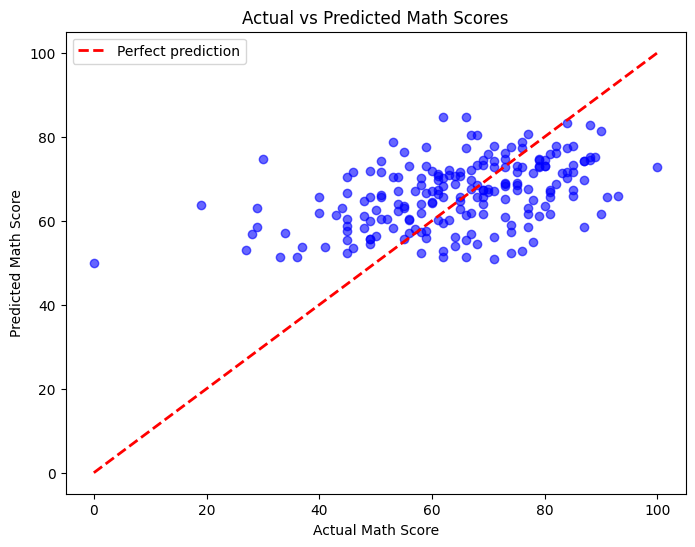

In [20]:
actual = y_test  # actual math scores
predicted = y_pred    # predicted math scores

plt.figure(figsize=(8,6))
plt.scatter(actual, predicted, alpha=0.6, color='blue')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 
         'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Scores')
plt.legend()
plt.show()

Here the red dotted line shows the perfect prediction and points close to the line are good predictions.

# Evaluation of model

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

In [22]:
print('train r2: ', model.score(X_train_scaled, y_train))
print("test  r2:", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))

train r2:  0.26055332214198323
test  r2: 0.18848589937761584
MAE : 11.155615407520779


The model is obviously not performing well.<br>
- MAE is off by around 11 points which is not good. The lower MAE, the better
- R2 score is also very low. R2 scores nearing 1 (>0.8) are usually considered good.

# Now training on RF Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

In [25]:
rf.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [26]:
rf_pred = rf.predict(X_test)

In [27]:
print('train r2: ', rf.score(X_train, y_train))
print("test  r2:", r2_score(y_test, rf_pred))
print("MAE :", mean_absolute_error(y_test, rf_pred))

train r2:  0.4129688283004763
test  r2: -0.01402378126338144
MAE : 12.330261555833413


In [28]:
X_rf = df.drop(columns=['math score'])
y = df['math score']

X_rf = pd.get_dummies(X_rf, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_rf, y, test_size=0.2, random_state=42
)

rf.fit(X_train, y_train)

from sklearn.metrics import r2_score, mean_absolute_error
print("test r2:", r2_score(y_test, rf.predict(X_test)))
print("MAE :", mean_absolute_error(y_test, rf_pred))


test r2: 0.8510363848347886
MAE : 12.330261555833413


Although MAE is off by 12, R2 Score has improved significantly and nears 1

# this explains a lot

Earlier we were using only demographic features such as race, gender, test preparation etc.<br>

but after including scores of reading and writing, we see that the prediction has improved significantly because there is a strong relationship between reading/writing and math scores<br>
there is an interdependence between scores in different subjects.<br>
this also shows that subject wise performance is better predicted using other academic factors rather than just using categorical demographic background factors

# Lets add reading and writing scores as independent data and only math score as dependent data and apply LR 

In [32]:
X = df.drop(columns=['math score'])
y = df['math score']

In [33]:
X['parental level of education'] = X['parental level of education'].map(education_map)

In [34]:
X['lunch'] = X['lunch'].map({
    'standard': 1,
    'free/reduced': 0
})

X['test preparation course'] = X['test preparation course'].map({
    'completed': 1,
    'none': 0
})

In [35]:
X = pd.get_dummies(
    X, 
    columns=['gender', 'race/ethnicity'],
    drop_first=True, 
    dtype=int
)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [37]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [38]:
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [39]:
y_pred = model.predict(X_test_scaled)

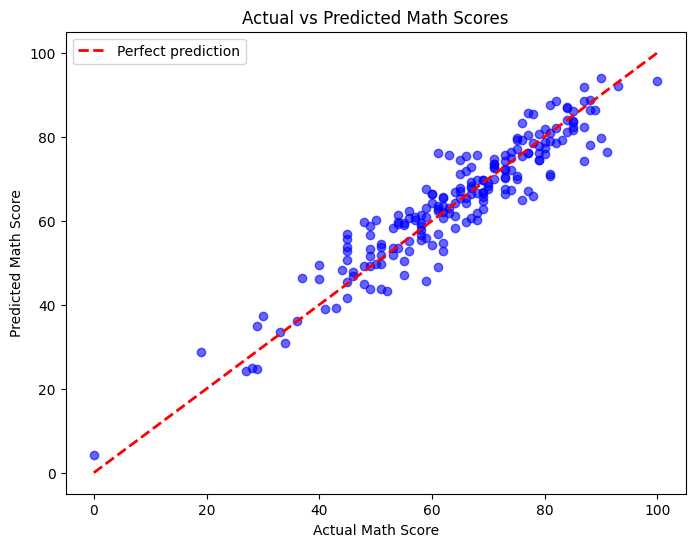

In [40]:
actual = y_test  # actual math scores
predicted = y_pred    # predicted math scores

plt.figure(figsize=(8,6))
plt.scatter(actual, predicted, alpha=0.6, color='blue')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 
         'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Scores')
plt.legend()
plt.show()

The prediction is good. The values are very near the line.

In [41]:
print('train r2: ', model.score(X_train_scaled, y_train))
print("test  r2:", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))

train r2:  0.8736565467932157
test  r2: 0.8815597679452446
MAE : 4.181966418321512


# the results have improved significantly